In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import gc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import sklearn

In [2]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

In [3]:
def compare_facies_plot(logs, compadre, facies_colors):
  
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 10))
    ax[0].plot(logs.GR, logs.Depth, '-g', alpha=0.8, lw = 0.9)
    ax[1].plot(logs.ILD_log10, logs.Depth, '-b', alpha=0.8, lw = 0.9)
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-k', alpha=0.8, lw = 0.9)
    ax[3].plot(logs.PHIND, logs.Depth, '-r', alpha=0.8, lw = 0.9)
    ax[4].plot(logs.PE, logs.Depth, '-c',  alpha=0.8, lw = 0.9)
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)
    return f


In [4]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_facies_log_plot(logs, facies_colors):
    
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 10))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)
    plt.show()

In [5]:
df = pd.read_csv('facies_data.csv')
hold_out_df = df[df['Well Name'] == 'NEWBY'] 


train_df = df[df['Well Name'] != 'NEWBY']  

In [6]:
train_df.sample(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
1026,4,A1 LM,LUKE G U,2663.5,76.150,0.633000,4.700,11.750,3.600,2,0.209
1844,5,C LM,CROSS H CATTLE,2820.5,74.014,0.945715,7.000,7.000,3.859,2,0.632
194,2,B3 SH,SHRIMPLIN,2890.0,60.630,0.740000,9.100,9.330,4.700,1,1.000
1710,1,B4 SH,CROSS H CATTLE,2739.5,53.622,0.206826,3.200,13.200,3.018,1,0.357
2847,8,A1 LM,CHURCHMAN BIBLE,2927.0,53.125,0.826000,1.122,4.835,4.008,2,1.000
3074,2,B4 SH,CHURCHMAN BIBLE,3040.5,70.875,0.733000,2.796,8.679,3.332,1,0.500
64,4,A1 LM,SHRIMPLIN,2825.0,64.820,0.680000,9.100,8.970,4.500,2,0.574
2130,2,B4 SH,NOLAN,2977.5,71.500,0.507000,1.750,9.236,3.400,1,0.750
1712,1,B4 SH,CROSS H CATTLE,2740.5,58.593,0.210586,5.600,14.200,2.992,1,0.321
3073,2,B4 SH,CHURCHMAN BIBLE,3040.0,68.938,0.735000,3.213,8.067,3.191,1,0.563


In [7]:
target = 'Facies'

dummies = pd.get_dummies(train_df[target]) 
facies_classes = dummies.columns 
y = dummies.values                  

drop_cols = ['Facies', 'Formation', 'Well Name', ] 

X = train_df.drop(drop_cols, axis=1)


y_hold_out = pd.get_dummies(pd.Categorical(hold_out_df[target], categories=facies_classes)).values    
X_hold_out = hold_out_df.drop(drop_cols, axis=1).values
print('training shape:', X.shape, y.shape)
print('hold out shape:', X_hold_out.shape, y_hold_out.shape)

training shape: (2769, 8) (2769, 9)
hold out shape: (463, 8) (463, 9)


SS      259
CSiS    640
FSiS    535
SiSh    126
MS      189
WS      366
D        82
PS      442
BS      130
Name: Facies, dtype: int64


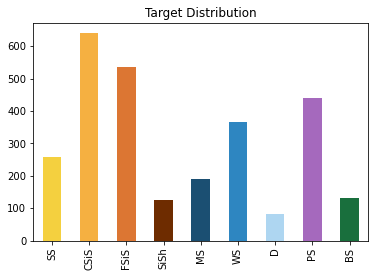

In [8]:
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D','PS', 'BS']

facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']


facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
train_df.loc[:,'FaciesLabels'] = train_df.apply(lambda row: label_facies(row, facies_labels), axis=1)

 
facies_counts = train_df[target].value_counts().sort_index()
facies_counts.index = facies_labels

print(facies_counts)
%matplotlib inline
facies_counts.plot(kind='bar',color=facies_colors, title='Target Distribution');

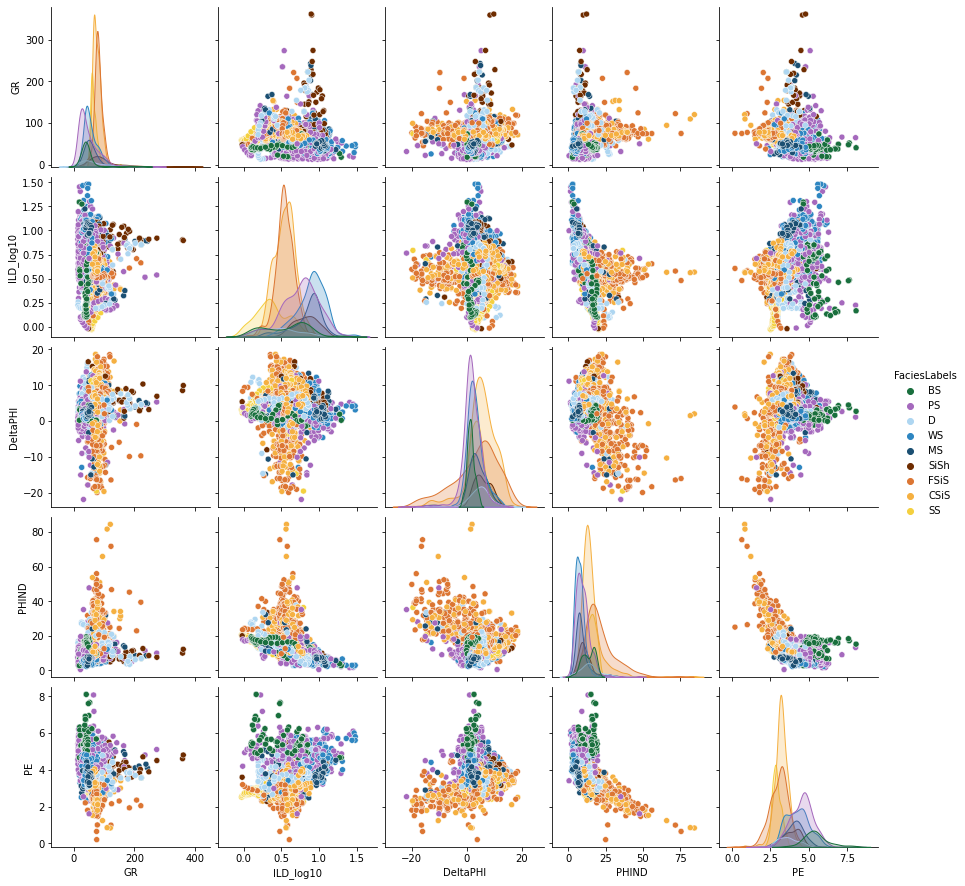

In [9]:
%matplotlib inline
sns.pairplot(train_df.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

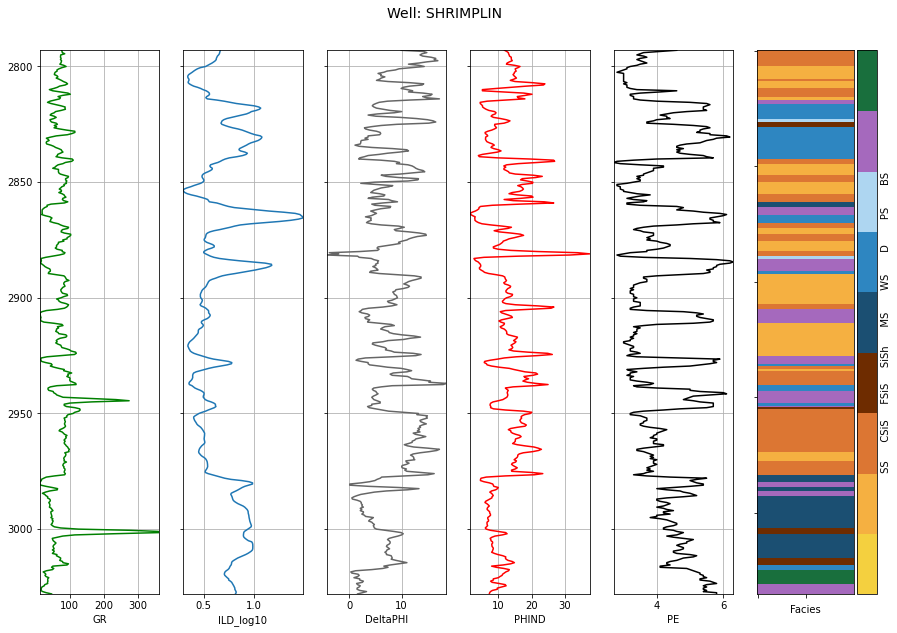

In [10]:
make_facies_log_plot(train_df[train_df['Well Name'] == 'SHRIMPLIN'], facies_colors)

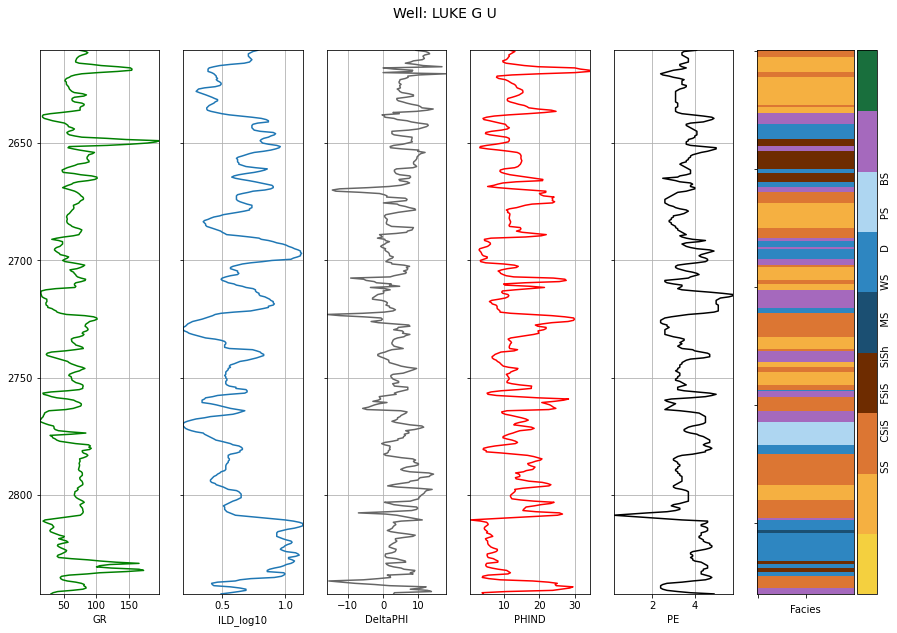

In [11]:
make_facies_log_plot(train_df[train_df['Well Name'] == train_df['Well Name'].unique()[2]], facies_colors)

In [12]:
sc = StandardScaler()

X = sc.fit_transform(X)
X_hold_out = sc.transform(X_hold_out)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=train_df[target])

print('training samples:', x_train.shape[0])
print('testing samples:', x_test.shape[0])
print('hold out samples:', X_hold_out.shape[0])

training samples: 2215
testing samples: 554
hold out samples: 463


In [13]:
dummies.columns[3]

4

In [14]:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import *
from skopt.utils import use_named_args

In [15]:
dim_learning_rate = Real(low=1e-4, high=1e-1, prior='uniform', name='learning_rate')
dim_num_dense_layers = Integer(low=3, high=10, name='num_dense_layers')
dim_num_dense_nodes = Integer(low=128, high=512, name='num_dense_nodes')
dim_activation = Categorical(categories=['relu', 'elu'], name='activation')
dim_dropout = Integer(low=1, high=5, name='dp')


dimensions = [
    dim_learning_rate,
    dim_num_dense_layers,
    dim_num_dense_nodes,
    dim_activation,
    dim_dropout
]


default_params = [1e-2, 4, 128, 'relu', 1]

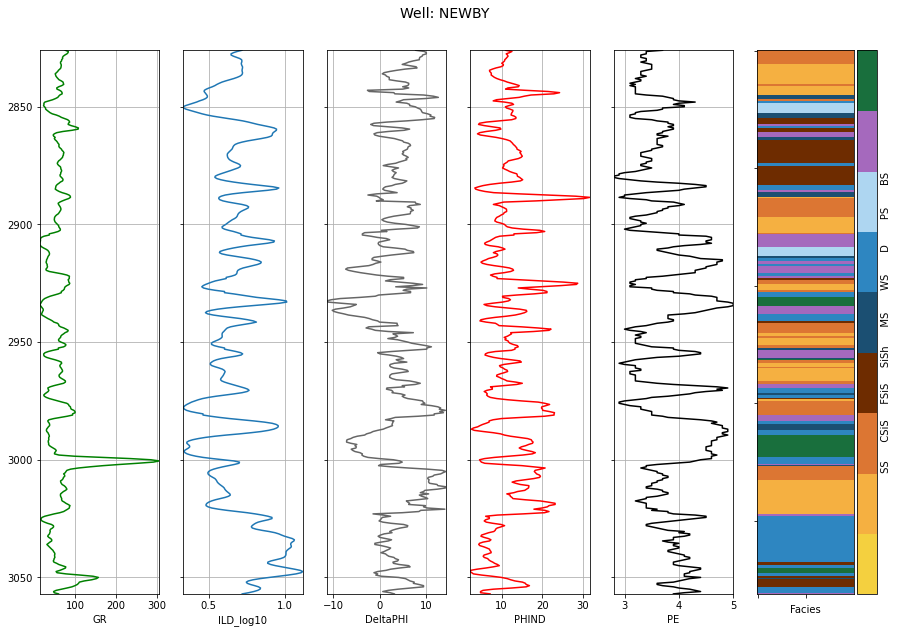

In [16]:
make_facies_log_plot(hold_out_df[hold_out_df['Well Name'] == 'NEWBY'], facies_colors)

In [17]:
def create_model(learning_rate, num_dense_layers,
                 num_dense_nodes, activation, dp):   
    
    
    model = Sequential()

    model.add(InputLayer(input_shape=(X.shape[1])))
    
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1)

        model.add(Dense(num_dense_nodes, activation=activation, name=name))
        model.add(Dropout(0.1*dp))   

    model.add(Dense(y.shape[1], activation='softmax'))
    
    opt = Adam(lr=learning_rate)
  
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['AUC'])
    return model

In [18]:
path_best_model = 'model.h5'
best_accuracy = 0.0

In [48]:
@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers,
            num_dense_nodes, activation, dp):   
    
    print('learning rate: {0:.1e}'.format(learning_rate))
    print('num_dense_layers:', num_dense_layers)
    print('num_dense_nodes:', num_dense_nodes)
    print('activation:', activation)
    print('dropout:', dp*0.1)
    print()

    model = create_model(learning_rate=learning_rate,
                         num_dense_layers=num_dense_layers,
                         num_dense_nodes=num_dense_nodes,
                         activation=activation,
                         dp=dp)  


    es = EarlyStopping(monitor='val_loss', patience=15)
    rlr = ReduceLROnPlateau(monitor='val_loss', patience=10)
   
    history = model.fit(x = x_train,
                        y = y_train,
                        epochs=200,
                        batch_size=128,
                        validation_data=(x_test, y_test),
                        callbacks=[es, rlr]
                       )

    score = max(history.history['val_auc'])   

    
    print('-'*20)
    print(f"> AUC: {score:.2%}")
    print('-'*20)

    global best_accuracy
    if score > best_accuracy:
        model.save(path_best_model)
        
        best_accuracy = score
        
    del model
    gc.collect()
    
    K.clear_session()
    
    return -1.0 * score

In [49]:
fitness(default_params)

learning rate: 1.0e-02
num_dense_layers: 4
num_dense_nodes: 128
activation: relu
dropout: 0.1

Epoch 1/200
18/18 [==============================] - 1s 34ms/step - loss: 1.3873 - auc: 0.8791 - val_loss: 1.0057 - val_auc: 0.9340
Epoch 2/200
18/18 [==============================] - 0s 7ms/step - loss: 1.0494 - auc: 0.9286 - val_loss: 0.9496 - val_auc: 0.9431
Epoch 3/200
18/18 [==============================] - 0s 7ms/step - loss: 0.9887 - auc: 0.9368 - val_loss: 0.9391 - val_auc: 0.9441
Epoch 4/200
18/18 [==============================] - 0s 7ms/step - loss: 0.9345 - auc: 0.9436 - val_loss: 0.8880 - val_auc: 0.9502
Epoch 5/200
18/18 [==============================] - ETA: 0s - loss: 0.9283 - auc: 0.944 - 0s 10ms/step - loss: 0.9289 - auc: 0.9446 - val_loss: 0.9221 - val_auc: 0.9458
Epoch 6/200
18/18 [==============================] - 0s 7ms/step - loss: 0.8735 - auc: 0.9500 - val_loss: 0.8154 - val_auc: 0.9568
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.8384

-0.9659179449081421